In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat


In [2]:
data = pd.read_csv(r'C:\Users\ANKUSH\Desktop\AI ML\ML\Datasets\Flipkart_Mobiles.csv')

In [3]:
data.head()


,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [4]:
data.drop('Original Price', axis=1, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          3114 non-null   object 
 1   Model          3114 non-null   object 
 2   Color          3114 non-null   object 
 3   Memory         3071 non-null   object 
 4   Storage        3075 non-null   object 
 5   Rating         2970 non-null   float64
 6   Selling Price  3114 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 170.4+ KB


In [6]:
data.describe()

,Rating,Selling Price
count,2970.000000,3114.000000
mean,4.243098,26436.625562
std,0.271991,30066.892622
min,2.300000,1000.000000
25%,4.100000,9990.000000
50%,4.300000,15000.000000
75%,4.400000,28999.000000
max,5.000000,179900.000000


In [7]:
data.isnull().sum()

Brand              0
Model              0
Color              0
Memory            43
Storage           39
Rating           144
Selling Price      0
dtype: int64

In [8]:
data[data.duplicated]

,Brand,Model,Color,Memory,Storage,Rating,Selling Price
144,OPPO,A5,Diamond Blue,4 GB,32 GB,4.4,15000
192,OPPO,Reno4 Pro Special Edition,Starry Night,8 GB,128 GB,4.4,34990
193,OPPO,Ravichandran Ashwin Limited Edition,Black,4 GB,64 GB,4.4,22990
449,ASUS,Zenfone Max Pro M1,Blue,4 GB,64 GB,4.3,15599
631,realme,X3 SuperZoom,Arctic White,8 GB,256 GB,4.3,29999
...,...,...,...,...,...,...,...
2275,Lenovo,K9 Note,Black,4 GB,64 GB,4.1,11999
2367,Motorola,One Vision,Bronze Gradient,4 GB,128 GB,4.2,14999
2403,Lenovo,A6 Note,Black,3 GB,32 GB,4.2,9999
2404,Lenovo,A6 Note,Blue,3 GB,32 GB,4.2,9999


In [9]:
data = data.drop_duplicates()

In [10]:
data['Memory'].value_counts()

Memory
4 GB      736
6 GB      492
3 GB      477
2 GB      365
8 GB      340
1 GB      191
4GB       113
12 GB      60
512 MB     46
4 MB       38
1.5 GB     29
16 MB      15
32 MB      14
64 MB      14
8 MB       10
768 MB      6
128 MB      4
10 MB       3
18 GB       2
16 GB       2
2 MB        2
46 MB       2
153 MB      1
32 GB       1
100 MB      1
30 MB       1
Name: count, dtype: int64

In [11]:
data = data[~data['Memory'].isin(['4 MB','16 MB','32 MB','64 MB','8 MB','128 MB','10 MB','18 MB','30 MB','2 MB','46 MB','153 MB','100 MB'])]

In [12]:
data['Memory'].value_counts()

Memory
4 GB      736
6 GB      492
3 GB      477
2 GB      365
8 GB      340
1 GB      191
4GB       113
12 GB      60
512 MB     46
1.5 GB     29
768 MB      6
16 GB       2
18 GB       2
32 GB       1
Name: count, dtype: int64

In [13]:
data['Memory'] = data['Memory'].fillna(data['Memory'].mode()[0])

In [14]:
l = []
for i in data['Memory']:
    if i[-2:]=='MB':
        l.append(float(i.replace('MB',''))/1024)
    elif i[-2:] == 'GB':
        l.append(float(i.replace('GB','')))

In [15]:
data['Memory'] = l

In [16]:
data['Memory'].value_counts()

Memory
4.00     889
6.00     492
3.00     477
2.00     365
8.00     340
1.00     191
12.00     60
0.50      46
1.50      29
0.75       6
16.00      2
18.00      2
32.00      1
Name: count, dtype: int64

In [17]:
data['Storage'].value_counts()

Storage
64 GB                    751
128 GB                   741
32 GB                    539
16 GB                    312
256 GB                   219
8 GB                     133
512 GB                    61
4 GB                      56
2 MB                      19
1 TB                      14
Expandable Upto 16 GB      5
129 GB                     3
Expandable Upto 32 GB      2
512 MB                     2
130 GB                     2
140 MB                     1
256 MB                     1
Name: count, dtype: int64

In [18]:
data = data[~data['Storage'].isin(['256 MB','140 MB','Expandable Upto 32 GB','Expandable Upto 16 GB','2 MB'])]

In [19]:
data['Storage'].value_counts()

Storage
64 GB     751
128 GB    741
32 GB     539
16 GB     312
256 GB    219
8 GB      133
512 GB     61
4 GB       56
1 TB       14
129 GB      3
512 MB      2
130 GB      2
Name: count, dtype: int64

In [20]:
# l2 = []
# for j in data['Storage']:
#         if j[-2:]== 'MB':
#             l2.append(int(j.replace('MB',''))/1024)
#         elif j[-2:] == 'TB':
#             l2.append(int(j.replace('TB',''))*1024)
#         elif j[-2:] == 'GB':
#             l2.append(int(j.replace('GB','')))

In [21]:
l2 = []
for j in data['Storage']:
    if isinstance(j, str):
        if j[-2:] == 'MB':
            l2.append(int(j.replace('MB', '')) / 1024)
        elif j[-2:] == 'TB':
            l2.append(int(j.replace('TB', '')) * 1024)
        elif j[-2:] == 'GB':
            l2.append(int(j.replace('GB','')))
    elif isinstance(j, float):  # Handle float values separately
        l2.append(j)


In [22]:
l2

[64,
 64,
 128,
 128,
 64,
 128,
 64,
 32,
 32,
 32,
 32,
 64,
 128,
 128,
 64,
 128,
 128,
 32,
 64,
 64,
 128,
 32,
 128,
 128,
 64,
 128,
 128,
 128,
 64,
 128,
 128,
 128,
 64,
 128,
 64,
 128,
 128,
 64,
 32,
 128,
 128,
 64,
 32,
 128,
 32,
 64,
 128,
 128,
 256,
 128,
 256,
 256,
 256,
 128,
 64,
 64,
 256,
 128,
 256,
 128,
 128,
 64,
 128,
 256,
 256,
 128,
 64,
 128,
 32,
 128,
 64,
 32,
 128,
 64,
 32,
 128,
 256,
 256,
 128,
 128,
 64,
 128,
 128,
 128,
 128,
 128,
 256,
 128,
 128,
 64,
 128,
 128,
 128,
 64,
 128,
 128,
 64,
 64,
 64,
 64,
 64,
 64,
 128,
 64,
 16,
 64,
 64,
 256,
 32,
 64,
 32,
 128,
 128,
 16,
 32,
 16,
 64,
 64,
 16,
 16,
 128,
 128,
 32,
 128,
 128,
 128,
 128,
 128,
 64,
 32,
 32,
 64,
 16,
 64,
 32,
 64,
 32,
 16,
 64,
 32,
 32,
 32,
 16,
 32,
 128,
 128,
 32,
 64,
 128,
 32,
 128,
 128,
 128,
 32,
 128,
 128,
 256,
 64,
 32,
 128,
 128,
 128,
 64,
 64,
 64,
 16,
 64,
 64,
 64,
 64,
 32,
 64,
 16,
 16,
 64,
 64,
 128,
 64,
 64,
 64,
 32,
 128,
 128,

In [23]:
len(l2)

2872

In [24]:
data['Storage'] = l2

In [25]:
data['Storage'].value_counts()

Storage
64.0      751
128.0     741
32.0      539
16.0      312
256.0     219
8.0       133
512.0      61
4.0        56
1024.0     14
129.0       3
0.5         2
130.0       2
Name: count, dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2872 entries, 0 to 3113
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          2872 non-null   object 
 1   Model          2872 non-null   object 
 2   Color          2872 non-null   object 
 3   Memory         2872 non-null   float64
 4   Storage        2833 non-null   float64
 5   Rating         2751 non-null   float64
 6   Selling Price  2872 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 179.5+ KB


In [27]:
data['Rating'] = data['Rating'].fillna(data['Rating'].mode()[0])

In [28]:
data['Storage'] = data['Storage'].fillna(data['Storage'].mode()[0])

In [29]:
data.sample(2)

,Brand,Model,Color,Memory,Storage,Rating,Selling Price
1332,Apple,iPhone 13 Mini,Blue,6.0,512.0,4.3,99900
278,LG,W11,Black,3.0,32.0,4.0,7690


In [30]:
data['Model'].value_counts()

Model
3                     26
iPhone 11             19
iPhone 13 Pro Max     19
iPhone 13 Pro Max     18
iPhone 12             18
                      ..
N5111                  1
U11+                   1
4a                     1
iPhone 6s              1
G3 Beat                1
Name: count, Length: 844, dtype: int64

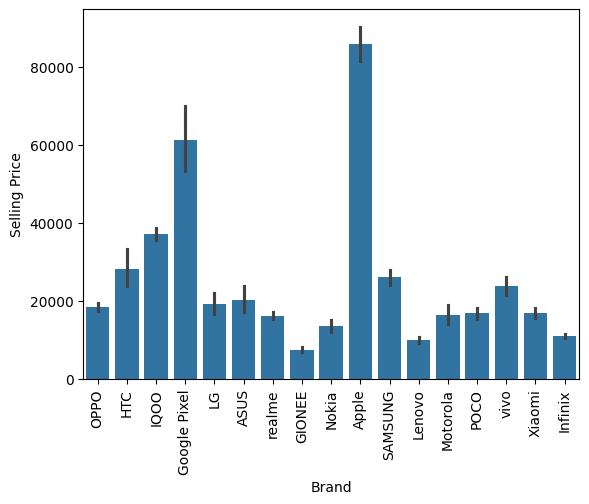

In [31]:
sns.barplot(x='Brand', y='Selling Price', data=data)
plt.xticks(rotation='vertical')
plt.show()

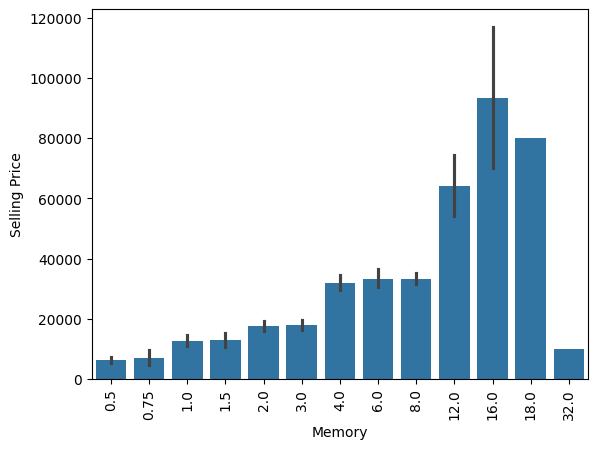

In [32]:
sns.barplot(x='Memory', y='Selling Price', data=data)
plt.xticks(rotation='vertical')
plt.show()

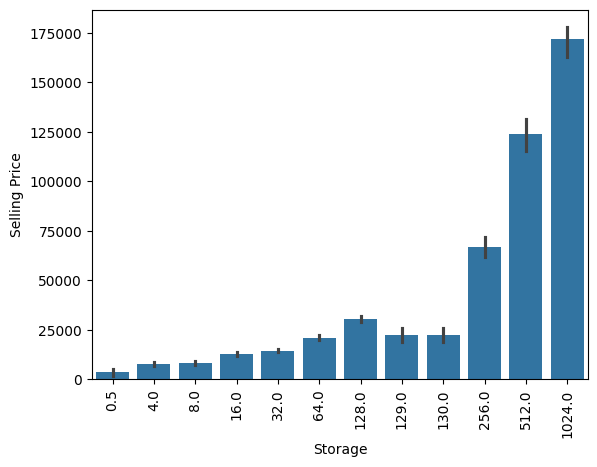

In [33]:
sns.barplot(x='Storage', y='Selling Price', data=data)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Storage', ylabel='Selling Price'>

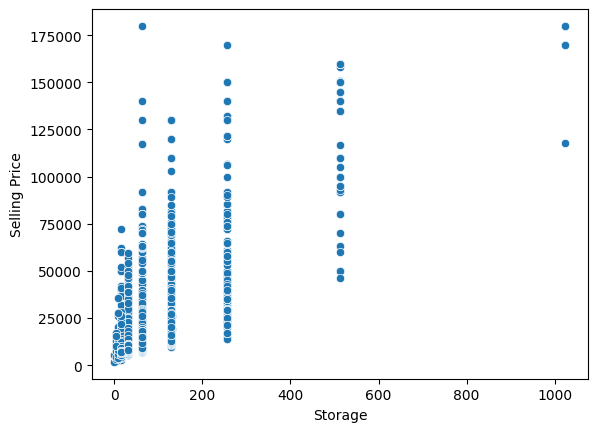

In [34]:
sns.scatterplot(x='Storage', y='Selling Price', data=data)

<Axes: xlabel='Memory', ylabel='Selling Price'>

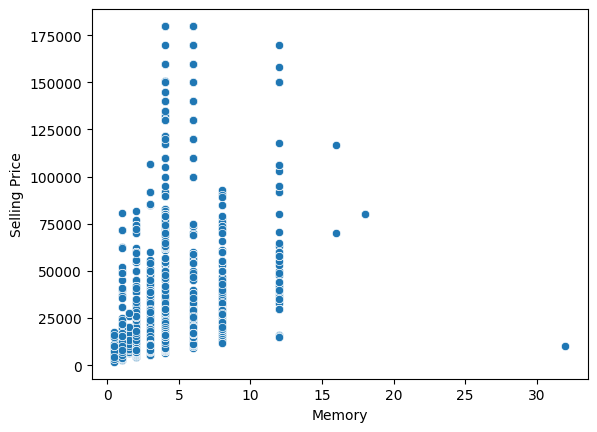

In [35]:
sns.scatterplot(x='Memory', y='Selling Price', data=data)

<Axes: xlabel='Rating', ylabel='Selling Price'>

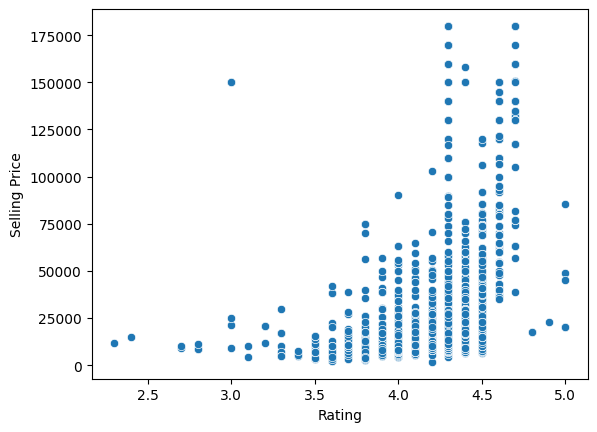

In [36]:
sns.scatterplot(x='Rating', y='Selling Price', data=data)

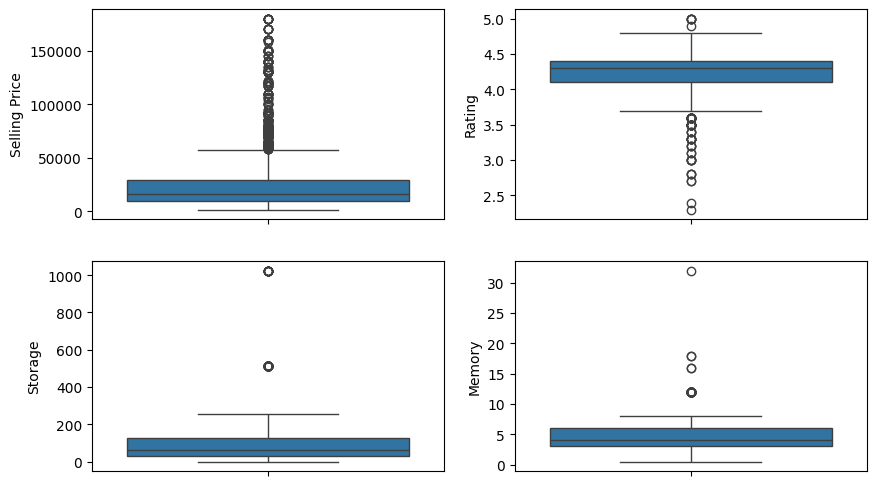

In [37]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.boxplot(data['Selling Price'])

plt.subplot(2,2,2)
sns.boxplot(data['Rating'])

plt.subplot(2,2,3)
sns.boxplot(data['Storage'])

plt.subplot(2,2,4)
sns.boxplot(data['Memory'])
plt.show()

In [38]:
data['Memory'][data['Memory']>data['Memory'].quantile(0.97)]

48      12.0
77      12.0
228     12.0
253     12.0
383     12.0
        ... 
2789    12.0
3011    12.0
3033    12.0
3034    12.0
3035    18.0
Name: Memory, Length: 65, dtype: float64

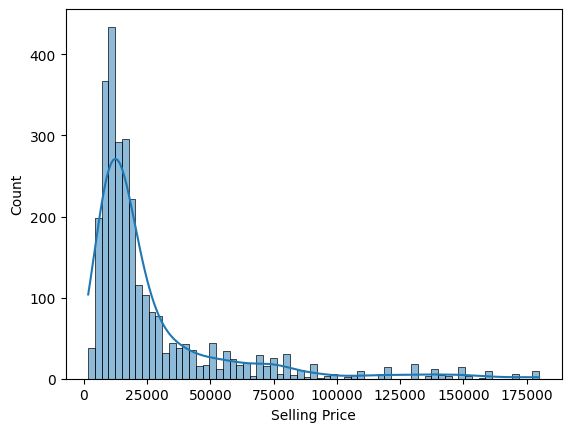

In [39]:
sns.histplot(data['Selling Price'], kde=True)
plt.show()

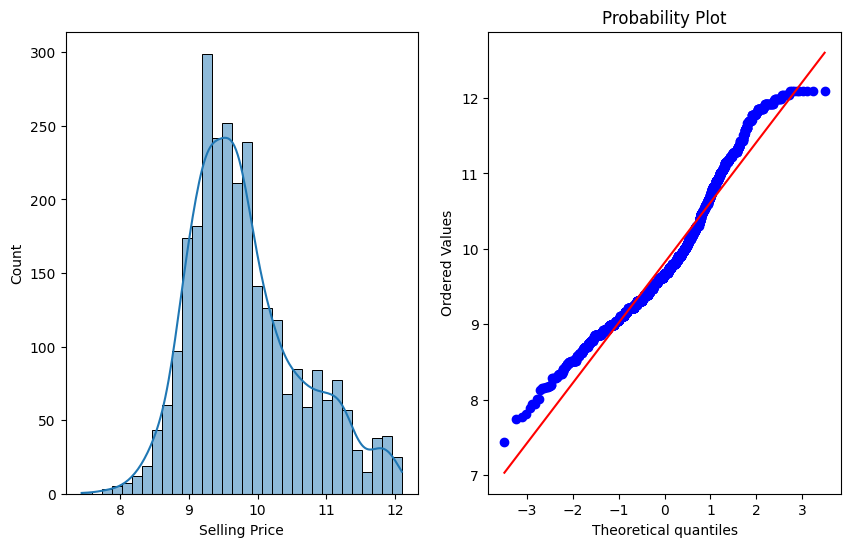

In [47]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(np.log(data['Selling Price']), kde=True)

plt.subplot(1,2,2)
stat.probplot(np.log(data['Selling Price']), plot=plt)
plt.show()

In [49]:
trp , lamp = stat.boxcox(data['Selling Price'])


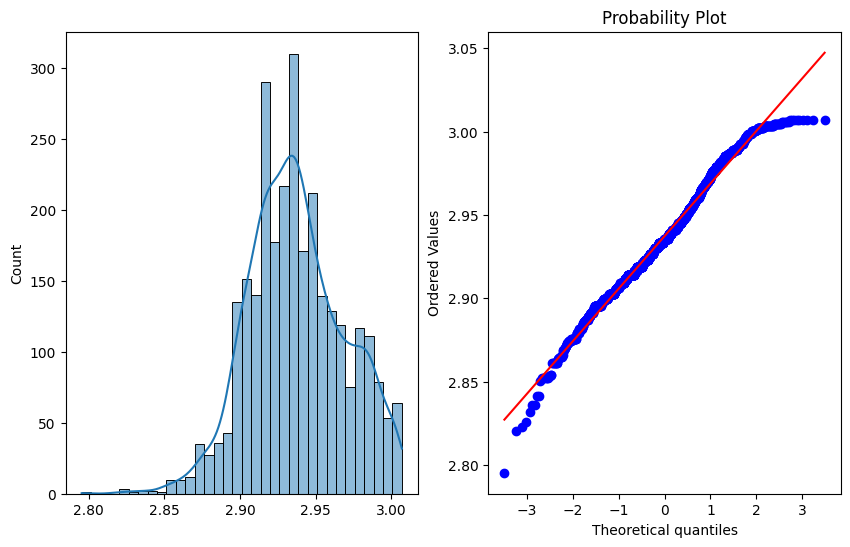

In [50]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(trp, kde=True)

plt.subplot(1,2,2)
stat.probplot(trp, plot=plt)
plt.show()

In [56]:
# data['Storage'][data['Storage']> data['Storage'].quantile(0.96)]data
q1= data['Storage'].quantile(0.25)
q3 = data['Storage'].quantile(0.75)

In [57]:
IQR = q3-q1

In [63]:
upper = q3 + (1.5*IQR)
lower = q1 - (1.5*IQR)

In [64]:
print(upper)
print(lower)

272.0
-112.0
